# Module 1 Examination
## DS122-L Statistical Computing Laboratory

*Carreon, Ma. Addine Anne T.* | *B37* | *01/06/2024*

### Instructions

Provide the given Python code to address each of the given tasks. You may use only the given libraries below. You may add additional code and markdown cells if necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Estimate the expected value of the random variable $X$ following the given distribution:

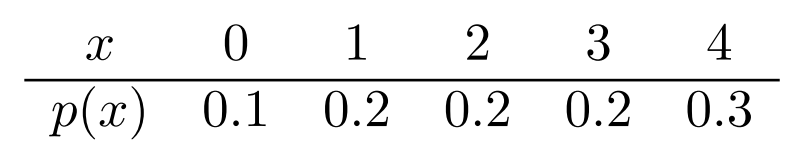

In [2]:
# Write your code here
x = [0, 1, 2, 3, 4]
p_of_x = [0.1, 0.2, 0.2, 0.2, 0.3]

expected_value = np.sum(np.array(x) * np.array(p_of_x))

print("The expected value of X is:", round(expected_value,4))

The expected value of X is: 2.4


#### 2. Perform rejection sampling to model the distribution of the pdf with the given x-axis bounds $[0,1]$:

<h2>$$f(x)=1-|2x-1|$$</h2>

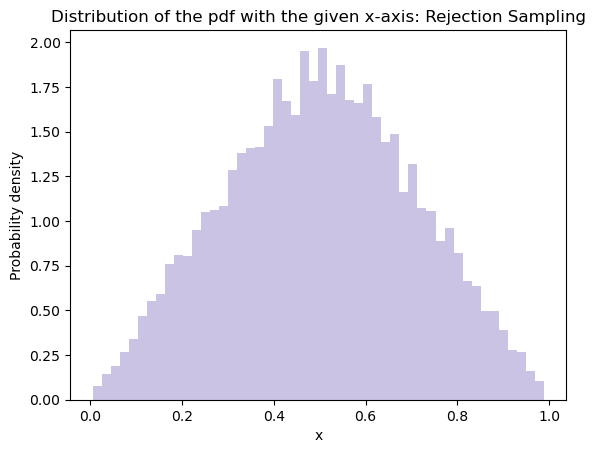

In [3]:
# Write your code here
def pdf(x):
   return 1 - np.abs(2 * x - 1)

max_pdf = pdf(0.5)  

def rejection_sampling(n_samples):
   samples = []
   while len(samples) < n_samples:
       x = np.random.uniform(0, 1)  
       u = np.random.uniform(0, max_pdf)
       if u <= pdf(x):  
           samples.append(x)
   return samples

samples = rejection_sampling(10000)

plt.hist(samples, bins=50, density=True, color='#CBC3E3')
plt.xlabel("x")
plt.ylabel("Probability density")
plt.title("Distribution of the pdf with the given x-axis: Rejection Sampling")
plt.show()

#### 3. Perform the inverse transorm method to model the distribution of the pdf with the given x-axis bounds $[0,\infty)$:

<h2>$$f(x)=3e^{-3x}$$</h2>

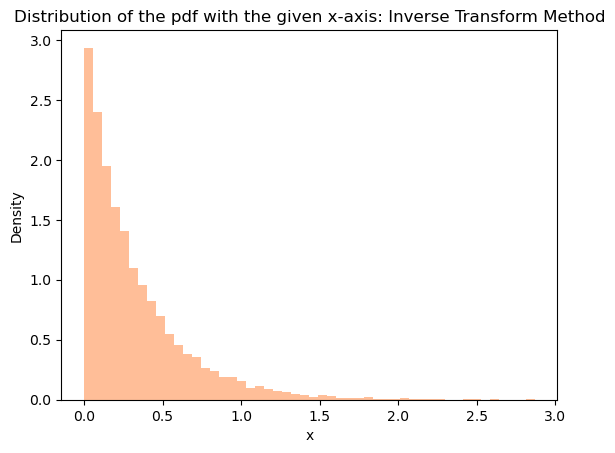

In [4]:
# Write your code here
def pdf(x):
   return 3 * np.exp(-3 * x)

def cdf(x):
   return 1 - np.exp(-3 * x)

def inverse_cdf(u):
   return -np.log(1 - u) / 3

n = 10000

samples = inverse_cdf(np.random.uniform(0, 1, n))

plt.hist(samples, density=True, bins=50, color='#FFBE98')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Distribution of the pdf with the given x-axis: Inverse Transform Method")
plt.show()

#### 4. Perform bootstrapping with 5000 bootstrap replicates on the given data `dist_sample` to estimate the confidence interval.

In [5]:
np.random.seed(4329)

dist_sample = np.random.rayleigh(2, size=10000)
dist_sample

array([2.98663844, 2.85774366, 3.09310641, ..., 4.85384172, 2.12402013,
       2.1007484 ])

In [6]:
# Write your code here
replicates = 5000

bt_replicates = np.empty(replicates)

for i in range(replicates):
    bt_sample = np.random.choice(dist_sample, size=len(dist_sample), replace=True)

    bt_replicates[i] = np.mean(bt_sample)

CI = np.percentile(bt_replicates, [2.5, 97.5])

print("Bootstrap replicates:", bt_replicates)
print("Confidence interval (95%):", CI)

Bootstrap replicates: [2.51006628 2.51188255 2.50223856 ... 2.50850089 2.52218322 2.51652834]
Confidence interval (95%): [2.47799879 2.53008018]
